In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
#import celltypist
#import scvi
import scvelo as scv
#from celltypist import models
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

version = '2023-05-16'

sc.settings.figdir = './scanpy/{}/graph'.format(version)
sc.settings.cachedir = './scanpy/{}/cache'.format(version)
%config InlineBackend.figure_format = 'retina'

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


# Data

In [2]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

AnnData object with n_obs × n_vars = 33577 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spli

In [3]:
adata_MC_B = adata_MC[adata_MC.obs['Major_category'] == 'B']
adata_MC_B

View of AnnData object with n_obs × n_vars = 1272 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'unspliced'
    obsp: 'conne

# B basic

meta NOT subset; don't know how to subset; dropped


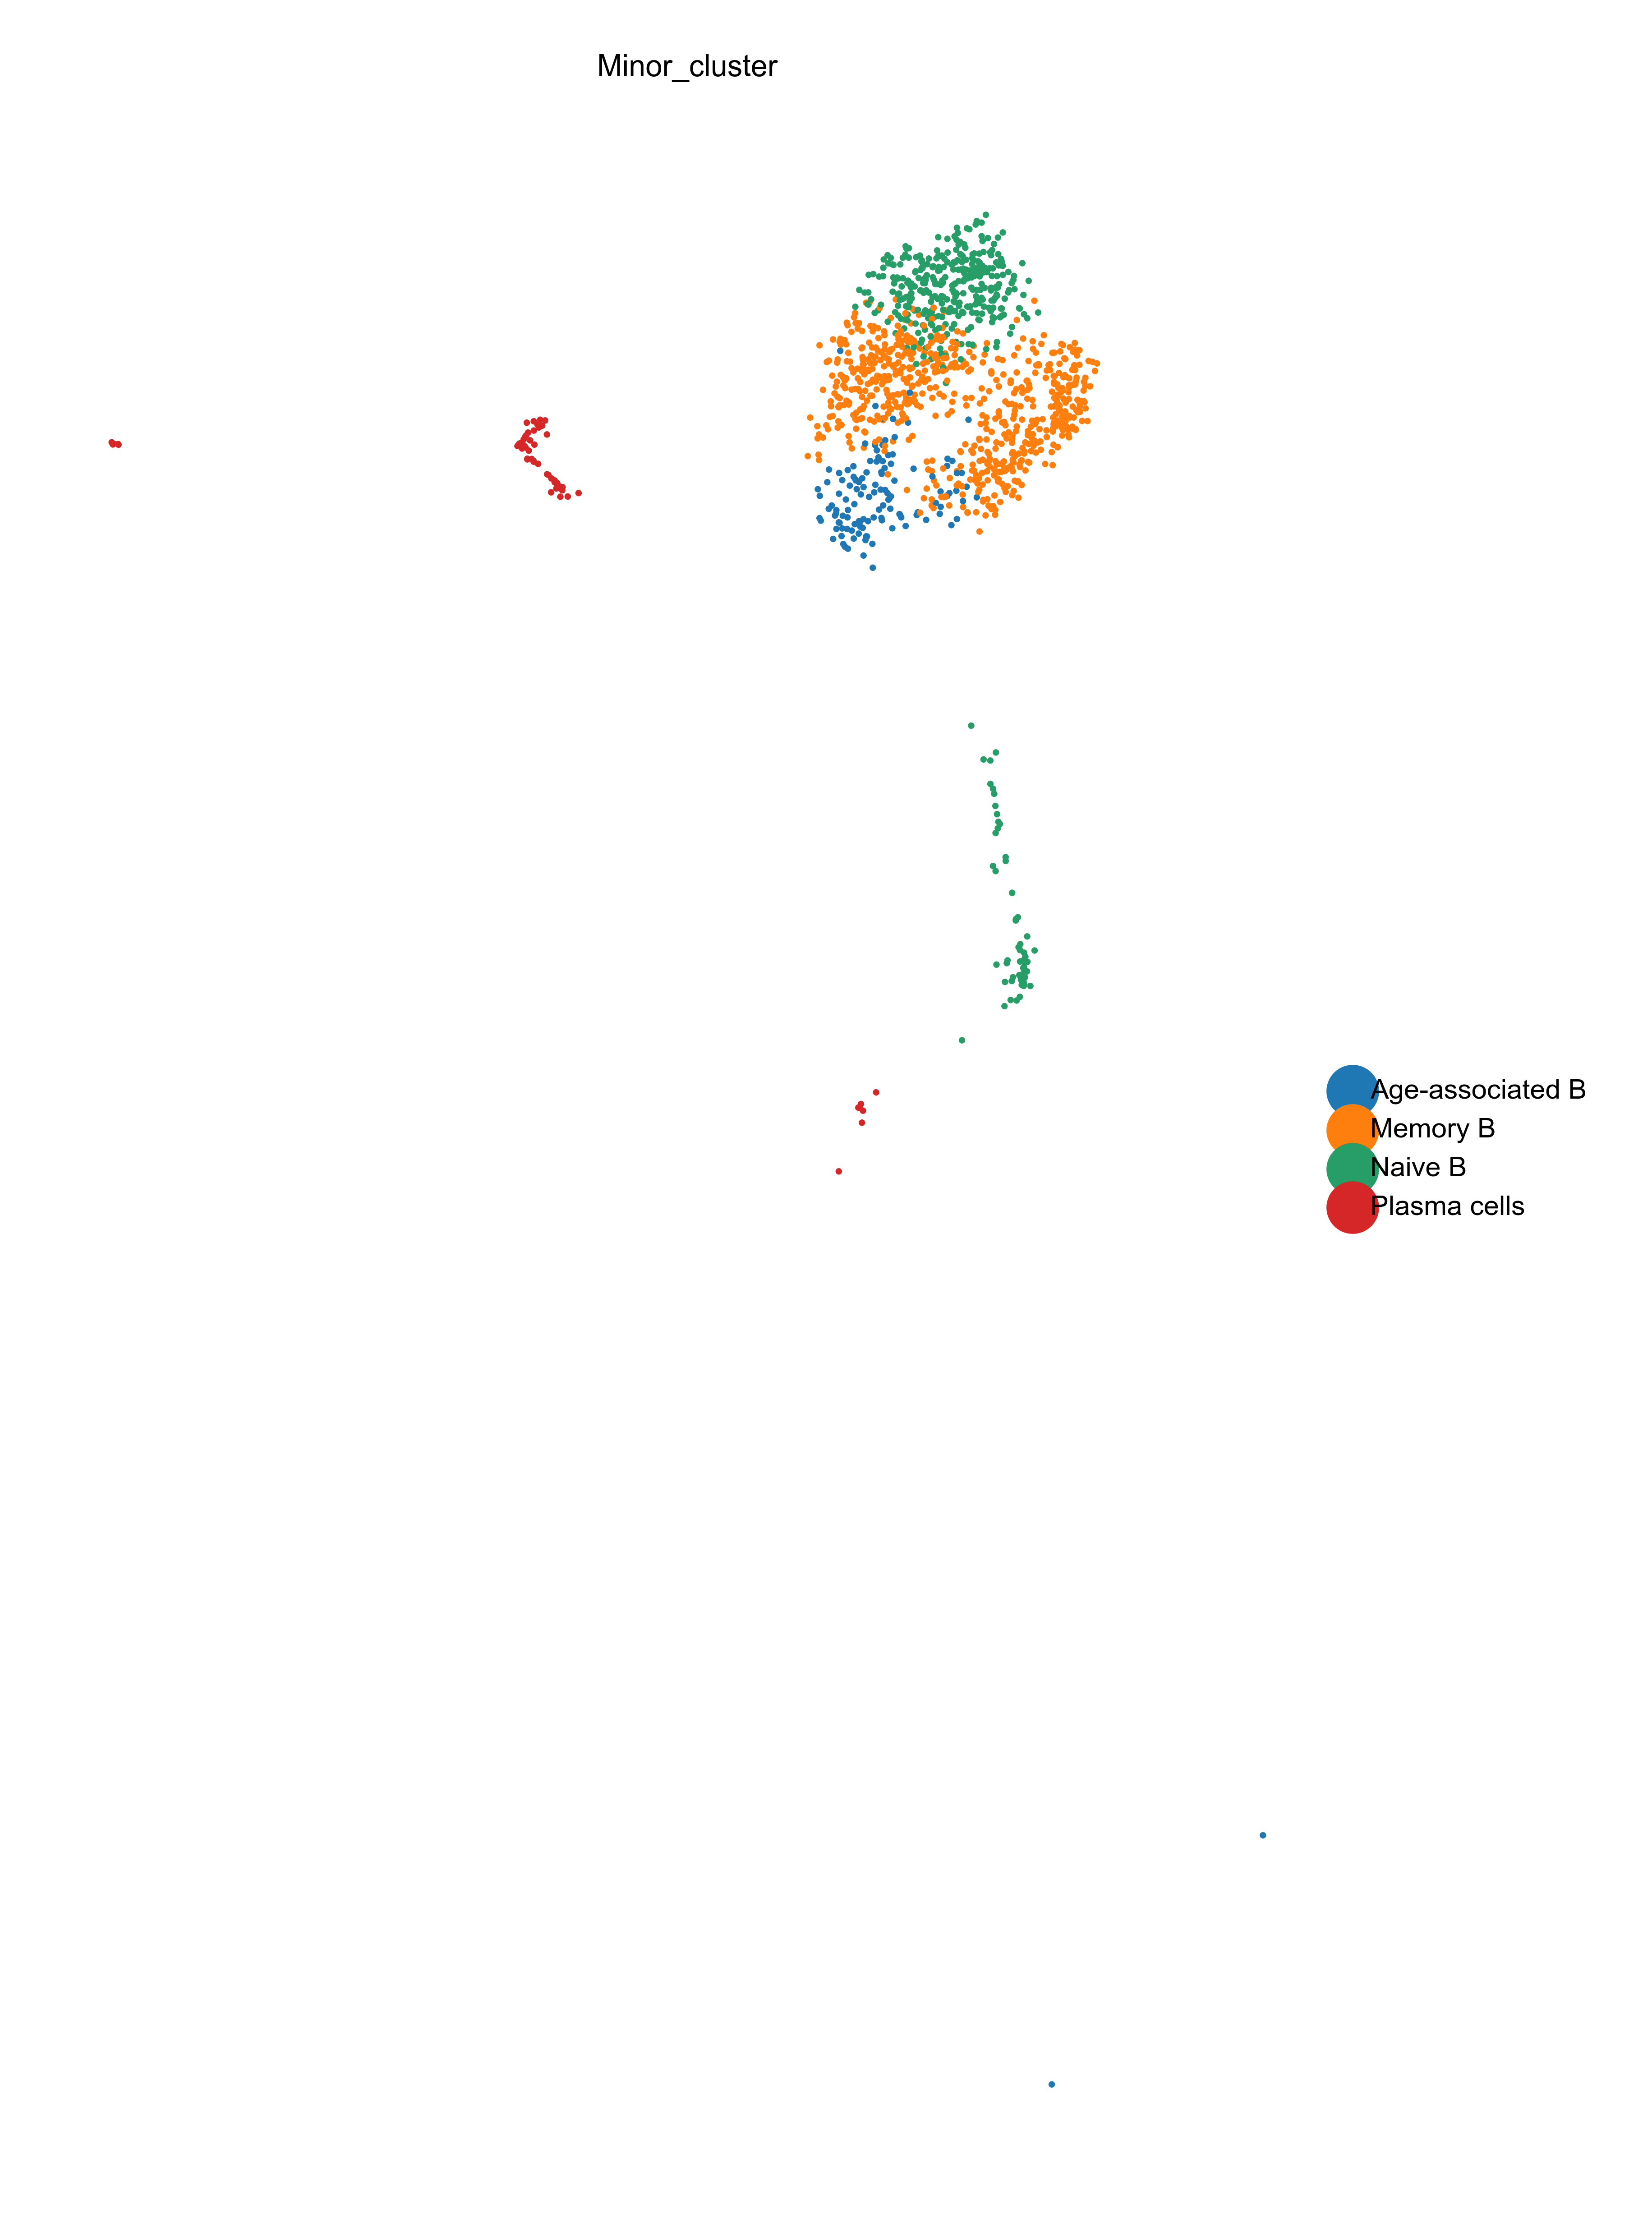

In [18]:
sc.set_figure_params(dpi=600, figsize= [3, 5], fontsize=4, transparent=False, frameon=False) #figsize= [8, 2], fontsize=6, viridis_r

sc.pl.umap(adata_MC_B, color=['Minor_cluster'] ,save='B Minor_cluster' , size = 3,  vmin= 2, color_map= 'viridis',) #palette= 'tab20',  legend_loc = 'on data'

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


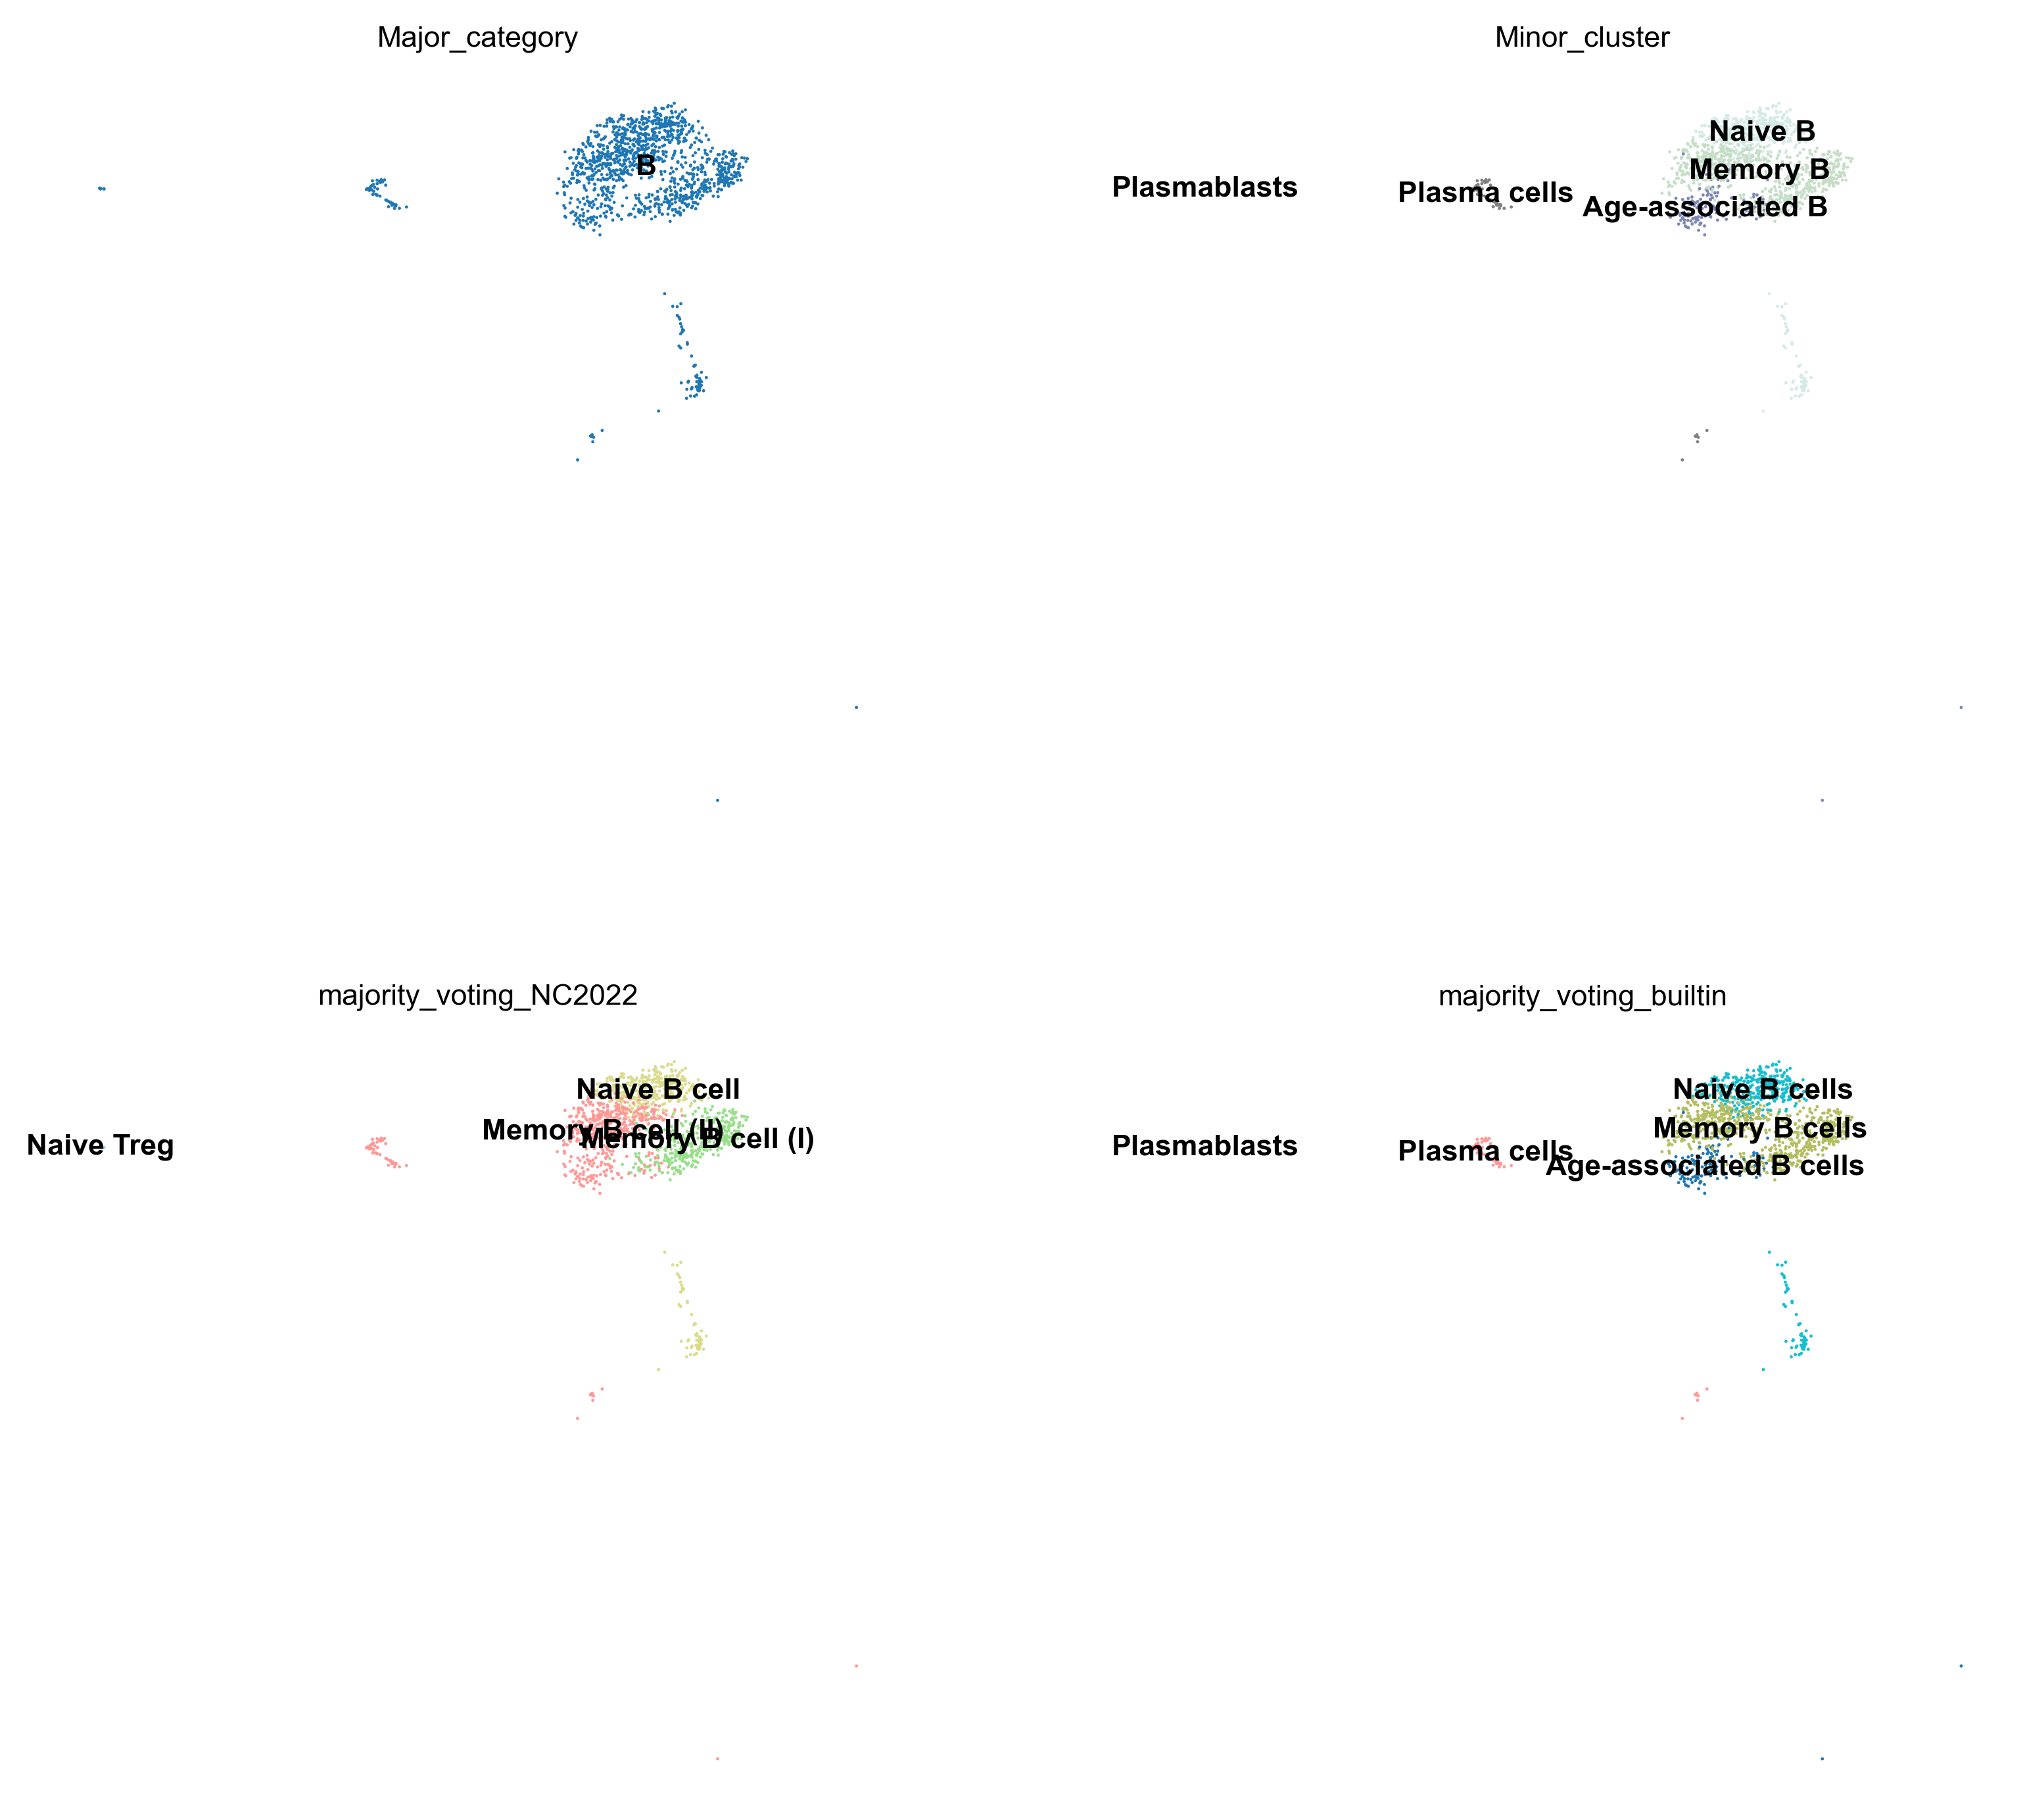

In [5]:
sc.set_figure_params(dpi=200, color_map = 'viridis_r', fontsize=8, transparent=True, frameon=False)

sc.pl.umap(adata_MC_B, color=['Major_category', 'Minor_cluster','majority_voting_NC2022', 'majority_voting_builtin'], legend_loc = 'on data', size=3 ,save='umap_leiden', ncols=2) 

meta NOT subset; don't know how to subset; dropped


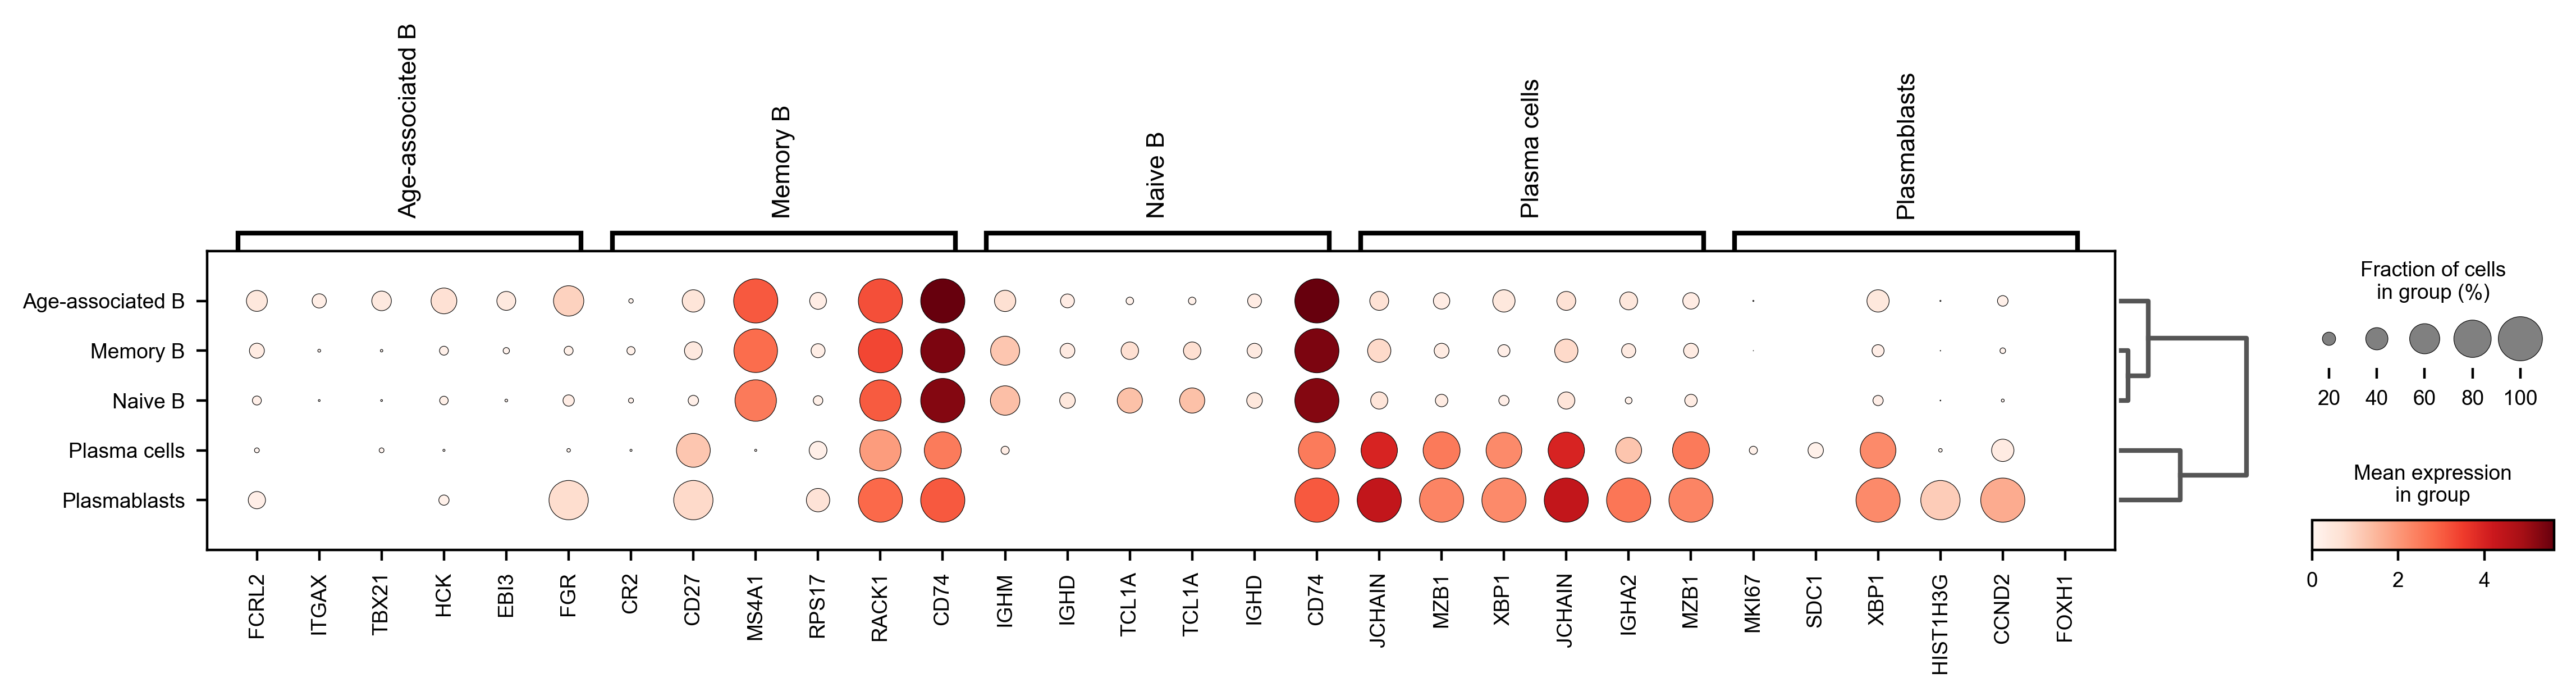

In [6]:
marker_genes_dict = {

    'Age-associated B': ['FCRL2', 'ITGAX',  'TBX21', 'HCK', 'EBI3', 'FGR'],
    'Memory B': ['CR2', 'CD27', 'MS4A1', 'RPS17', 'RACK1', 'CD74'],
    'Naive B':	['IGHM', 'IGHD', 'TCL1A', 'TCL1A', 'IGHD', 'CD74'],
    'Plasma cells':	['JCHAIN', 'MZB1', 'XBP1', 'JCHAIN', 'IGHA2', 'MZB1'],
    'Plasmablasts':	['MKI67', 'SDC1', 'XBP1', 'HIST1H3G', 'CCND2', 'FOXH1'],
    
}

sc.tl.dendrogram(adata_MC_B, groupby='Minor_cluster')
sc.pl.dotplot(adata_MC_B, marker_genes_dict, groupby='Minor_cluster', dendrogram=True, save='huan B marker gene NC ')

# B RNA-velocity

In [12]:
adata_MC_B_MC = adata_MC_B[adata_MC_B.obs['Phenotype'] == 'MG_crisis']
adata_MC_B_MC

View of AnnData object with n_obs × n_vars = 666 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenoty

meta NOT subset; don't know how to subset; dropped


saving figure to file ./figs/scvelo_B.pdf


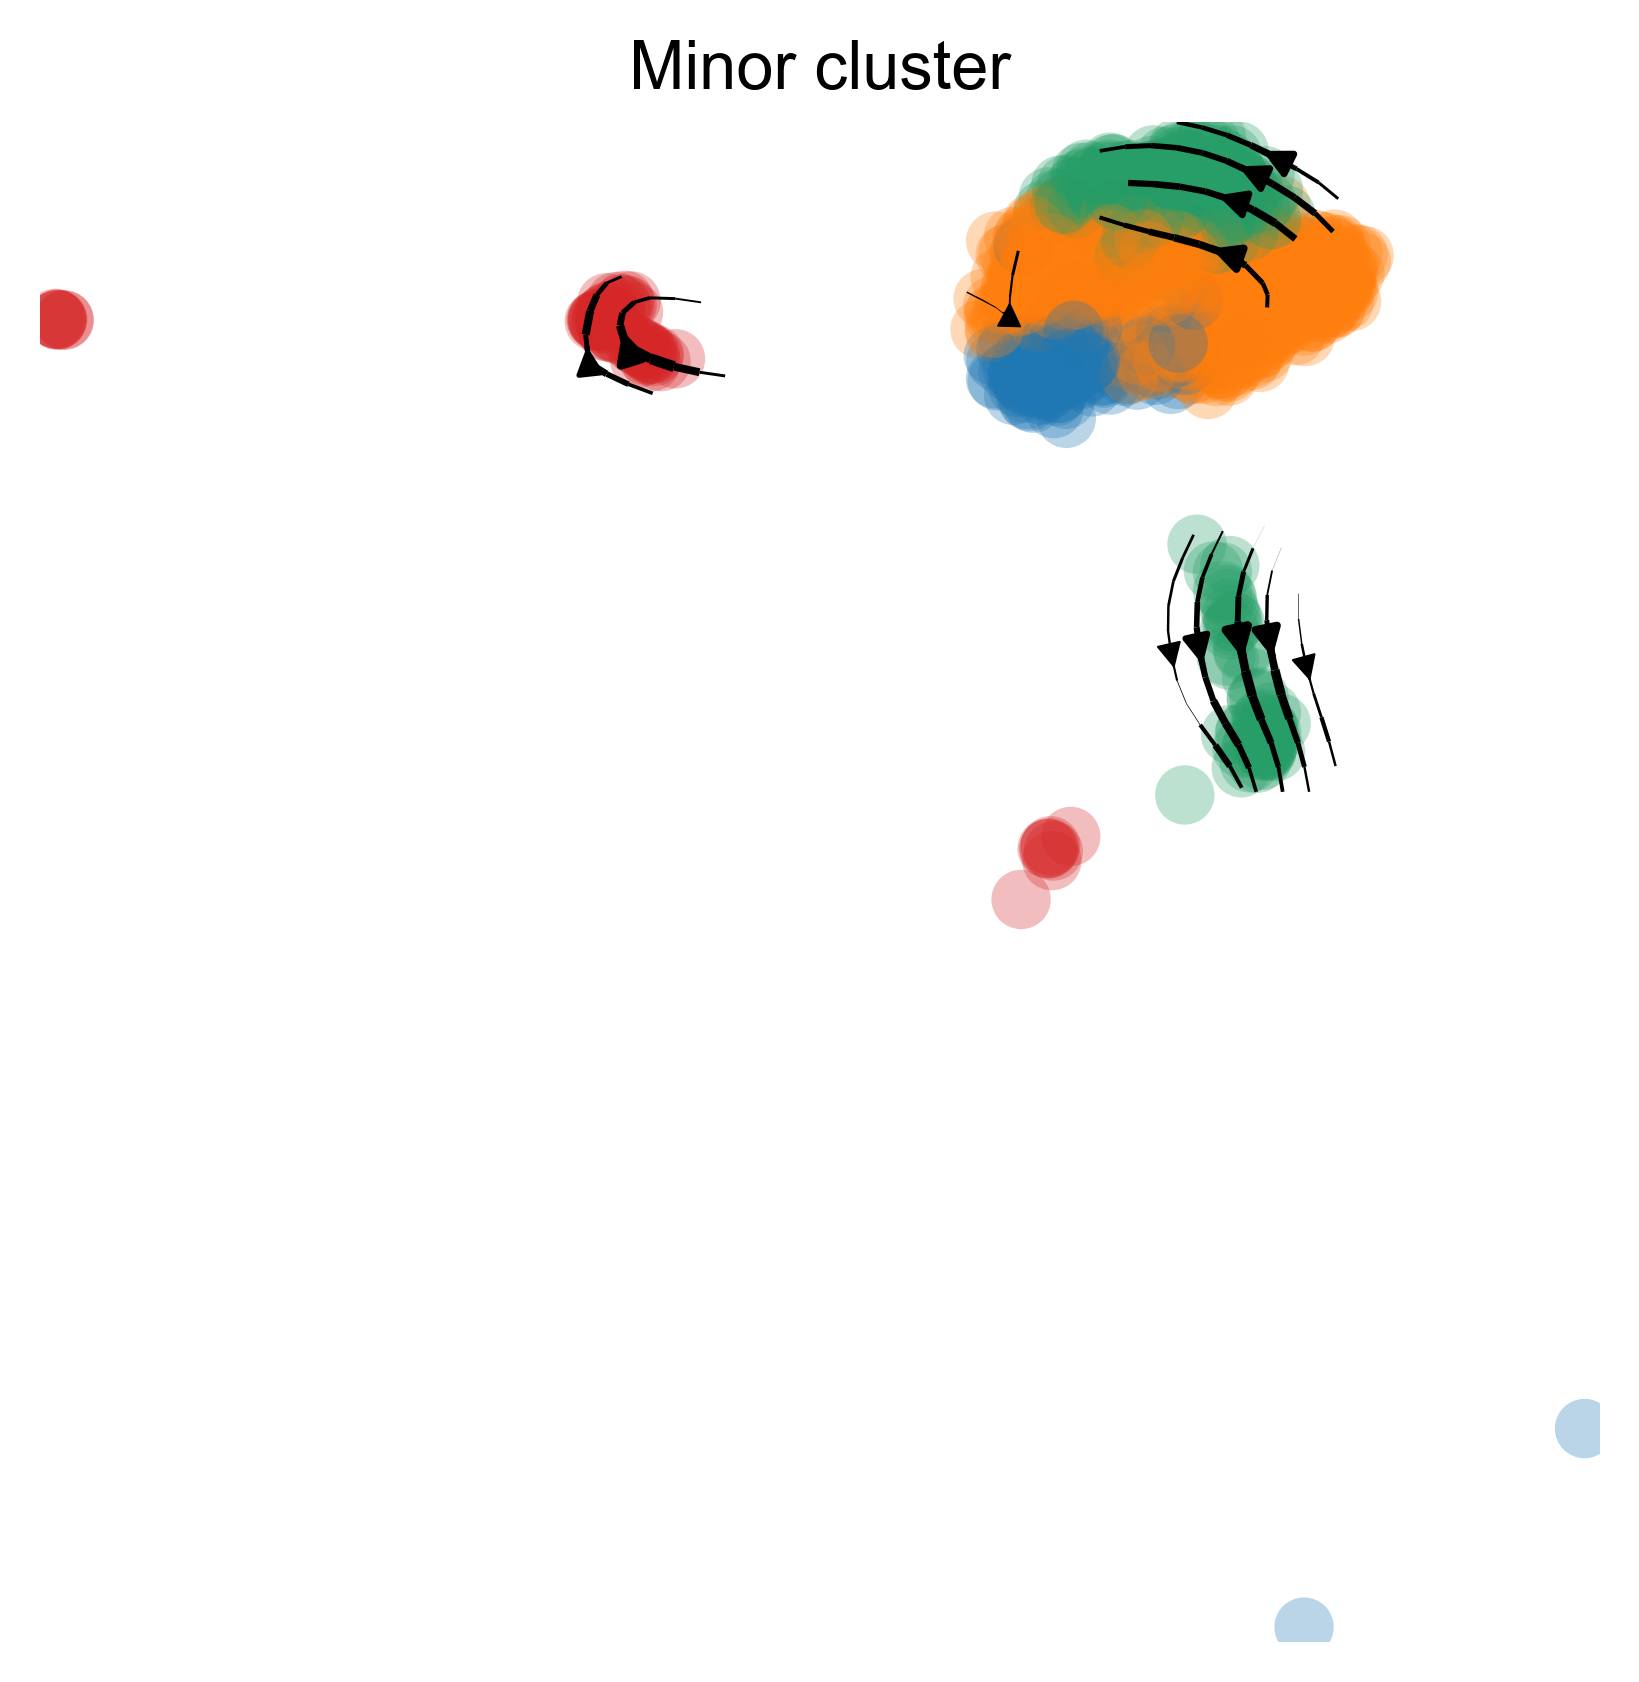

In [22]:
scv.set_figure_params(dpi=200, figsize=[5,5], color_map='viridis') #
scv.pl.velocity_embedding_stream(adata_MC_B, basis='umap', figsize=(5,5), save= './figs/scvelo_B.pdf',  color='Minor_cluster', color_map='viridis', legend_loc = False)

meta NOT subset; don't know how to subset; dropped


saving figure to file ./figs/scvelo_B.pdf


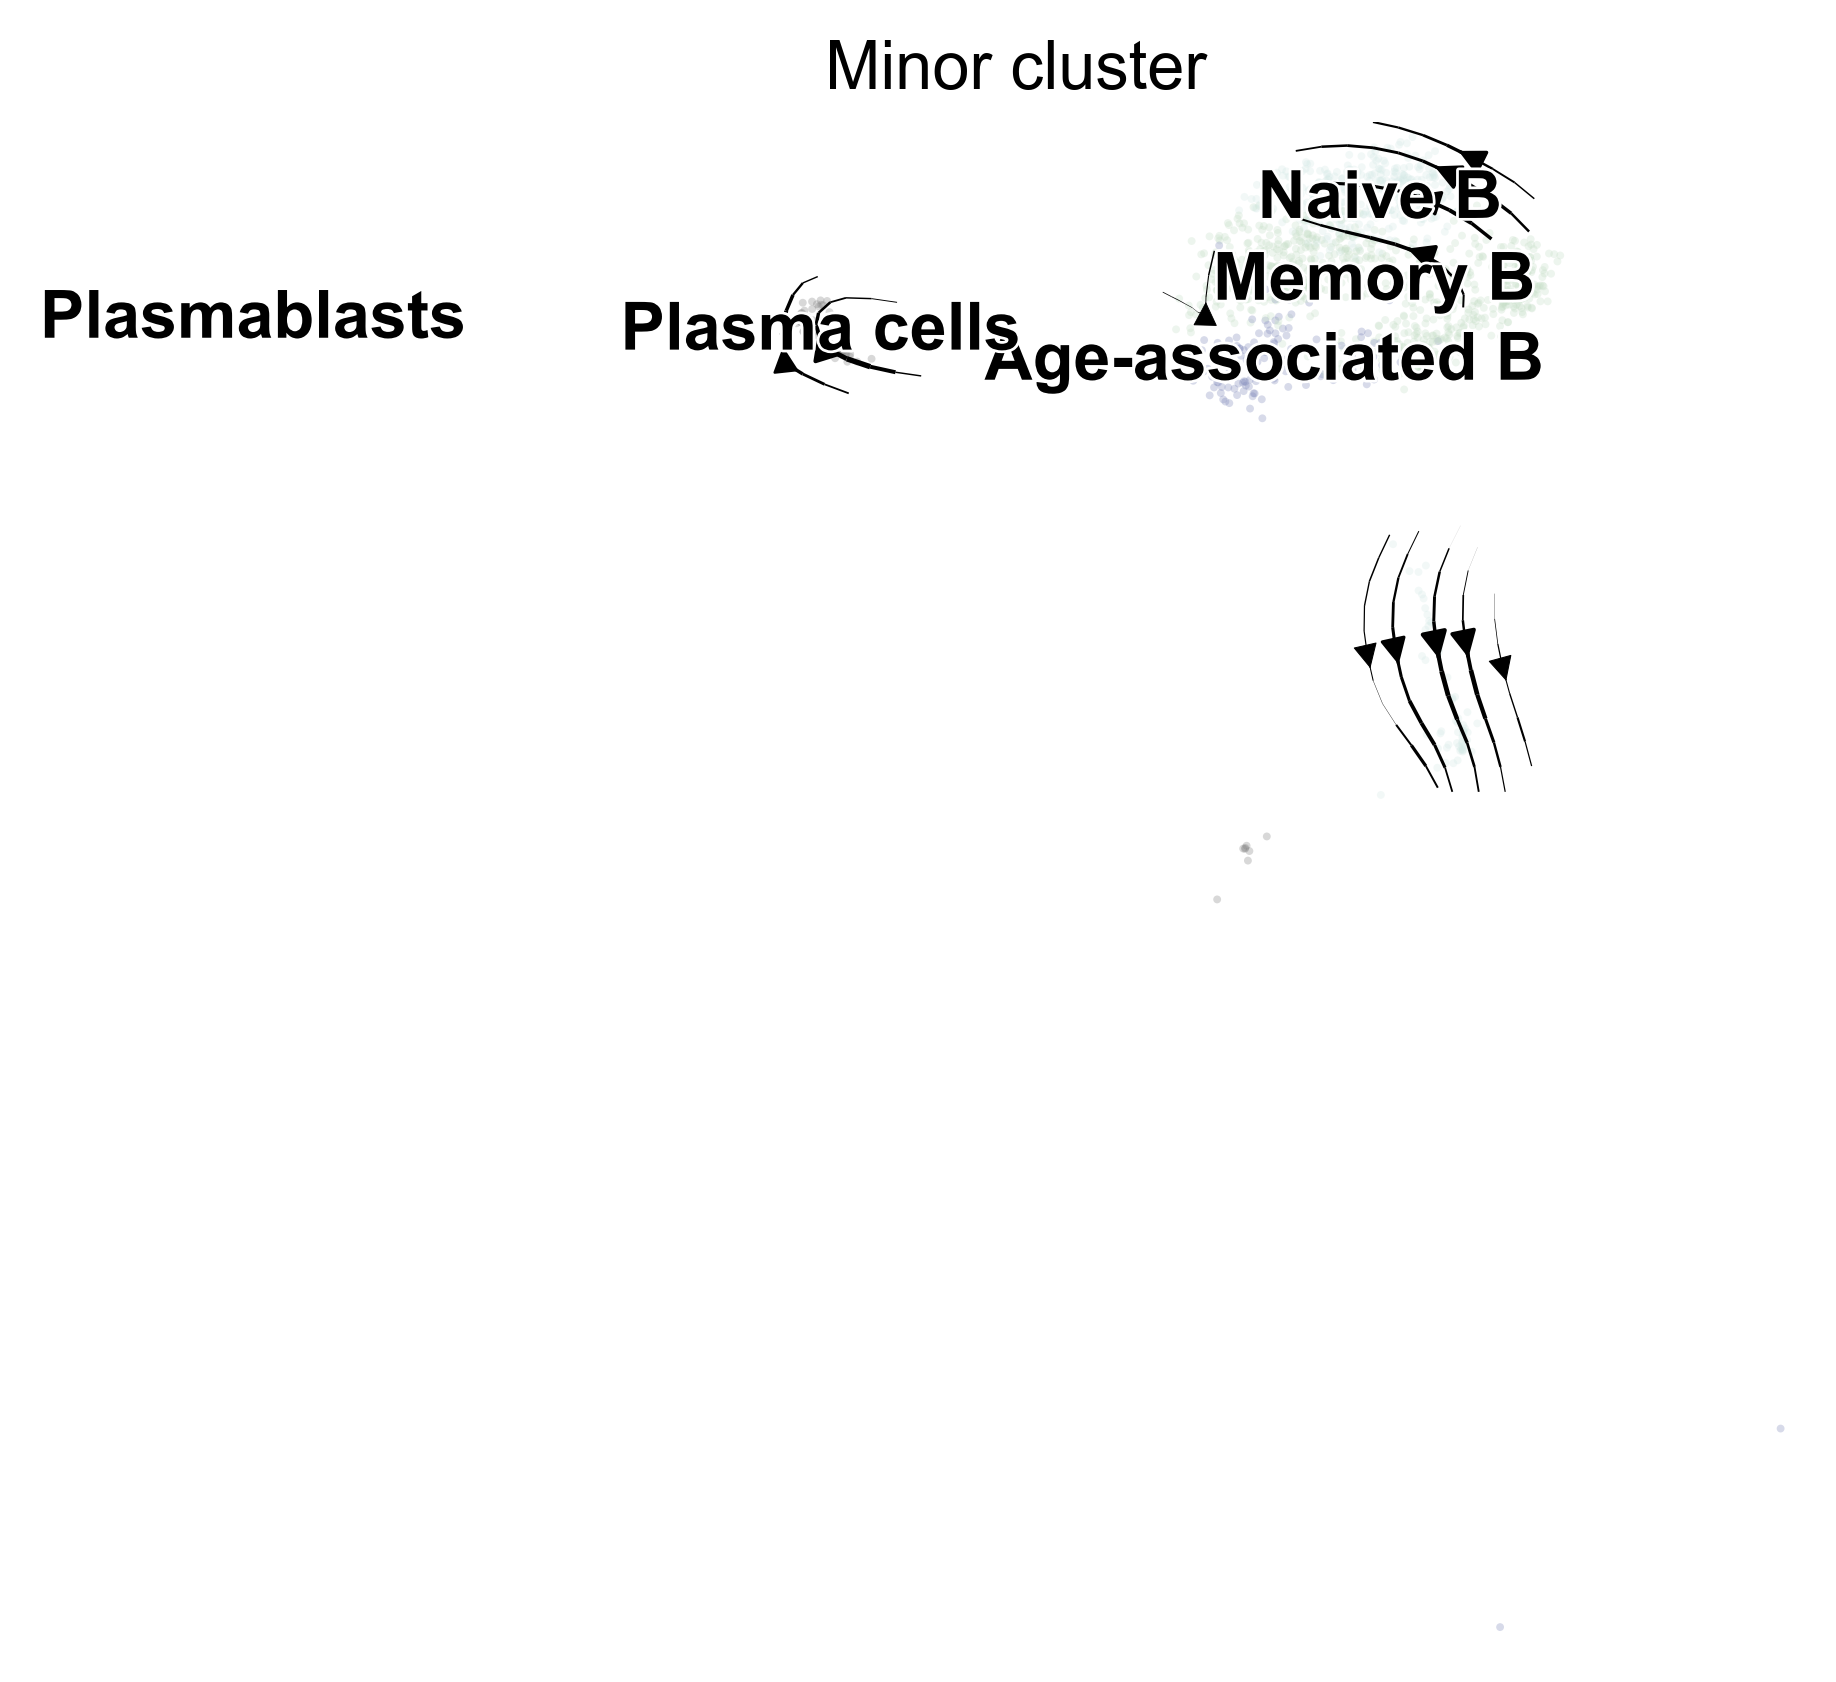

In [11]:
scv.pl.velocity_embedding_stream(adata_MC_B, basis='umap', figsize=(5,5), size=8, linewidth=0.5 ,save= './figs/scvelo_B.pdf', color='Minor_cluster')

In [14]:
scv.pp.moments(adata_MC_B, n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(adata_MC_B, n_jobs=10)
scv.tl.velocity(adata_MC_B, mode='dynamical', n_jobs=10)
scv.tl.velocity_graph(adata_MC_B, n_jobs=10)
#scv.set_figure_params(dpi=200, figsize=[5,5], color_map='viridis')
#scv.pl.velocity_embedding_stream(adata_MC_B, basis='umap', figsize=(5,5), size=8, fontsize=3, linewidth=0.5, save= './figs/scvelo_B.pdf', color='Minor_cluster') #,linewidth=0.5

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/16 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:20) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 10/16 cores)
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


# B DEG

In [4]:
sc.tl.rank_genes_groups(adata_MC_B, 'Phenotype', method='wilcoxon', key_added = "wilcoxon")
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC_B, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > 0.5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)

Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

Crisis_genes.to_csv('./write/B_DEG_MC_vs_AC.csv', index=False)

glist_up: 20, glist_down: 400, glist_all: 420


['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease

<AxesSubplot: title={'center': 'CellMarker_Augmented_2021'}, xlabel='Combined Score'>

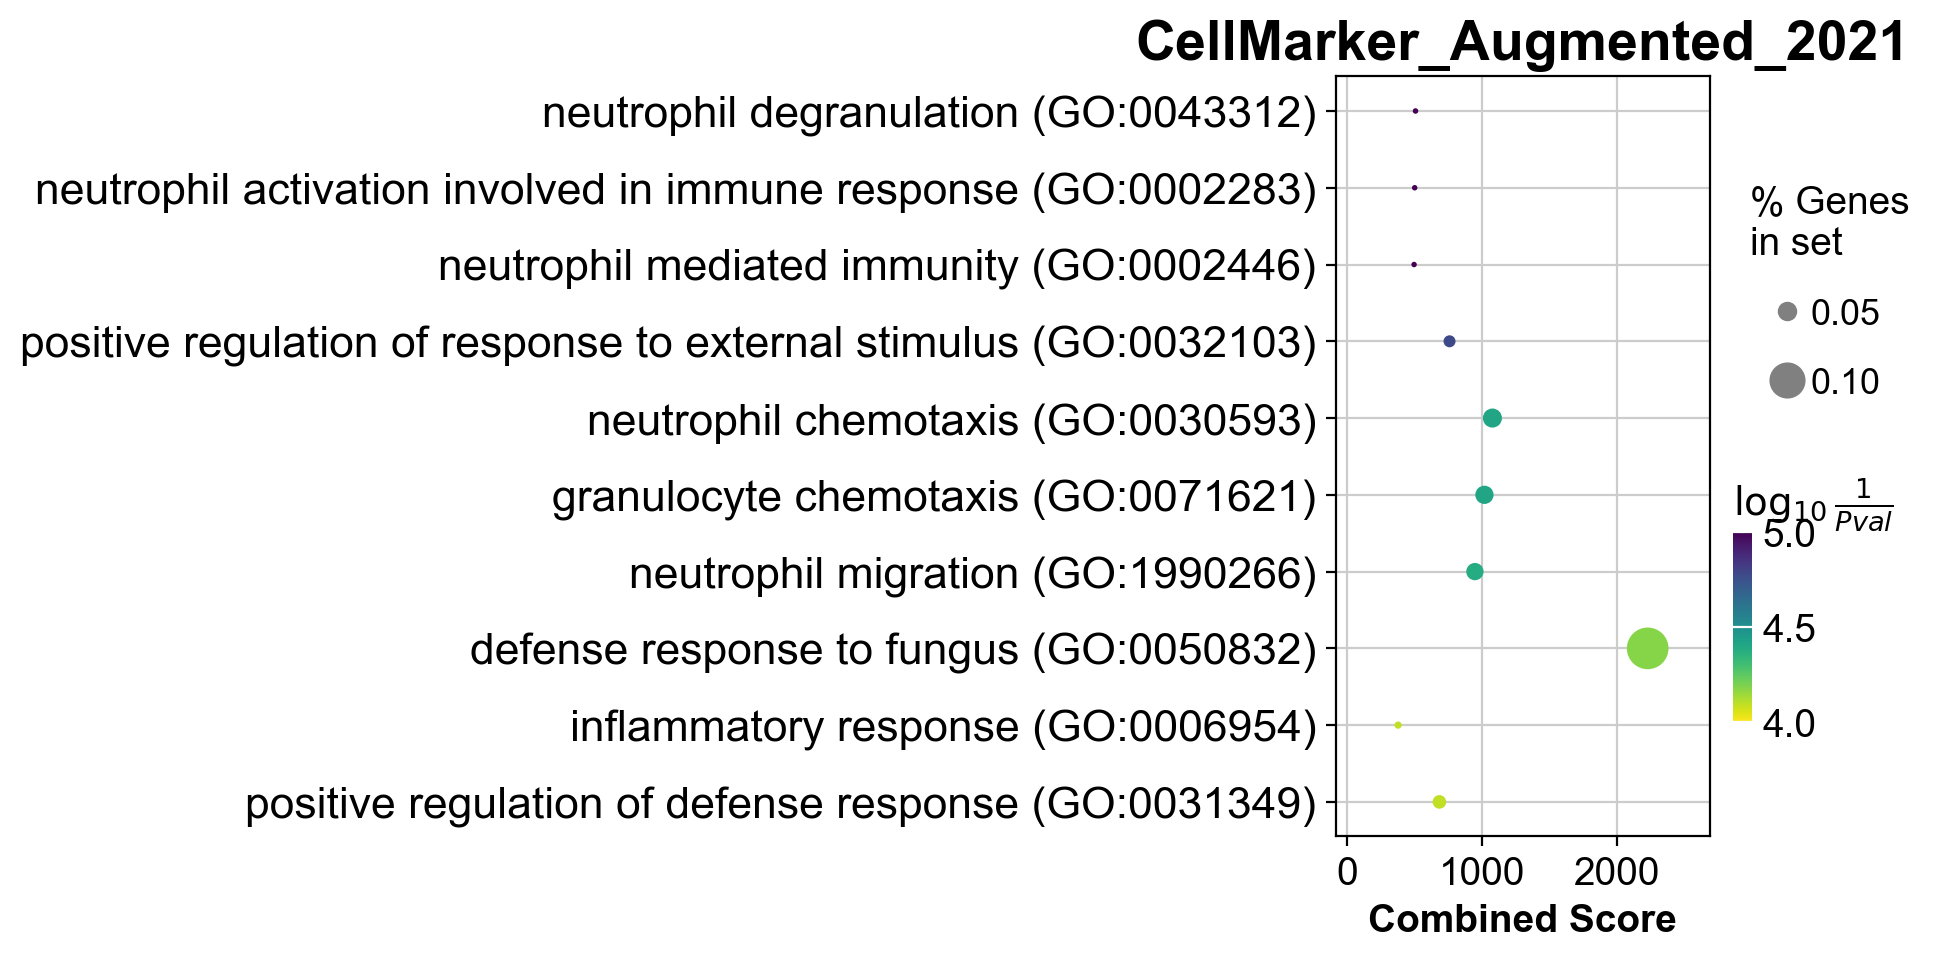

In [5]:
import gseapy as gp

#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gp.get_library_name(organism='Human')
print(gene_set_names)

#GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)


enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                     top_term= 10,
                     cutoff = 0.5)

#enr_res.results.head(10)

gp.dotplot(enr_res.res2d, title='CellMarker_Augmented_2021',cmap='viridis_r', size=20, figsize=(3,5), cutoff = 0.5)